## Reduced Design Region Classification For Feature Selection

**Authors**: Rahul Venkatesh, Martha Grover, Elsa Reichmanis

This code uses a reduced design region approach (McBride, M., *et al.* (2018). **Processes** 6(7)) to analyze a small database  of DPP-DTT based OFET devices for improved electronic performance. The main goal is to identify the most important processing variables/features that can confine the high performing OFET devices to a reduced design region to gain new insights and guide future experiments.

**Dataset Details** :

The dataset comprises of 115 OFET devices fabricated from neat DPP-DTT (92 devices) as well as a blend of DPP-DTT with an insulating matrix like PDMS, polystyrene and PCBM (23 devices). **In this work, we will only focus on the 92 OFET devices fabricated from neat DPP-DTT.** 

34 design variables/features**[X]** were identified that were either numerical(21 features) or categorical(13 features). Examples of the numerical features include variables with continuous values such as polymer weight average molecular weight (Mw), polydispersity (PDI), solution concentration, etc. While the categorical features include solvent type, deposition type, annealing environment, etc. **In this work we will focus primarily on the numerical design variables.**

The **average OFET hole mobility** will be the target performance metric**[Y]** that we are interested in and the values reported in this dataset range from 1E-5 to 8.5 cm2/V.s indicating the strong influence of the processing variables. 

In [1]:
# %% Import libraries
import pylab as plt
import numpy as np
import pandas as pd

In [2]:
# %% Figure plotting information 
def fig_fmt():
    font = {'family': 'Arial',
            #'color':  'darkred',
    #         'weight': 'bold',
            'size': 12,
            }
    plt.rc('font', **font)
    plt.rc('axes', linewidth = '1')
    plt.rc('xtick', labelsize = 12)
    plt.rc('ytick', labelsize = 12)
    plt.rcParams['xtick.major.size'] = 8
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['xtick.minor.size'] = 6
    plt.rcParams['xtick.minor.width'] = 1
    plt.rcParams['ytick.major.size'] = 8
    plt.rcParams['ytick.minor.size'] = 6
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['ytick.minor.width'] = 1
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

#Set font options
font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

Import file containing data points. Since this database is quite small (115 rows, 59 columns), the data was extracted manually and inputted into a .csv file



In [3]:
df = pd.read_csv('DPPDTT_LiteratureDB_D3.csv',index_col='Device_Index')
pd.set_option('max_columns', 58)
df

,Year,DOI,SP_Mw (kg/mol),SP_Mn (kg/mol),SP_PDI,Solvent_1,Solvent_1_BP (C),Solvent_2,Solvent_2_BP (C),Solvent_VF1 (%),SP_Concentration (g/L),Insulating_Matrix,IM_Concentration (mg/ml),IM_MW (kg/mol),IM_PDI,SP_Blend (wt%),Solution_Processing_Environment,Substrate_Type,Dielectric_Material_1,Dielectric_Material_1_Thickness (nm),Dielectric_Material_2,Dielectric_Material_2_Thickness (nm),Source/Drain_Electrode_Material,Chanel_Width (μm),Chanel_Length (μm),Capacitance_Per_Unit_Area (nF/cm2),Substrate_Treatment,Deposition_Type,Spin_Rate (rpm),Spin_Time (s),Blade_Speed (mm/s),Blade_Height (um),Blade_Angle (degrees),Channel_Orientation_WRT_Coating_Direction,Stage_Temperature (C),Anneal_Temperature (C),Anneal_Time (hr),Annealing Environment,Deposition_Environment,OFET_Configuration,OFET_Regime,Film_Thickness (nm),Average_OFET_Hole_Mobility (cm2/Vs),STDEV_OFET_Hole Mobility (cm2/Vs),Average_OFET_Electron_Mobility (cm2/Vs),STDEV_OFET_Electron_Mobility (cm2/Vs),Vth_Hole (V),Vth_Electron (V),Ion/Ioff,Mobility_Charaterization_Environment,SS (V/Decade),Transfer_Curve _Vds,Transfer_Curve_Vg_min (V),Transfer_Curve_Vg_max (V),Output Curve_Vg_min (V),Output_Curve _Vg_max (V),Output_Curve_Vd_min (V),Output_Curve_Vd_max (V)
Device_Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2015,10.1039/C5TC02579F,299.0,90.0,3.32,C6H5CL,132.0,NaN,NaN,100.0,4.0,NaN,NaN,NaN,NaN,100.0,Ambient,N-Doped Si,SiO2,300.0,NaN,NaN,Au,1500.0,80.0,10.0,Untreated,Spin-Coating,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inert,Ambient,BGTC,Saturation,NaN,0.110,NaN,NaN,NaN,NaN,NaN,380.0,Ambient,8.3,NaN,-60.0,30.0,NaN,NaN,NaN,NaN
2,2015,10.1039/C5TC02579F,299.0,90.0,3.32,C6H5CL,132.0,NaN,NaN,100.0,4.0,NaN,NaN,NaN,NaN,100.0,Ambient,N-Doped Si,SiO2,300.0,NaN,NaN,Au,1500.0,80.0,10.0,MTS,Spin-Coating,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inert,Ambient,BGTC,Saturation,NaN,0.290,NaN,NaN,NaN,NaN,NaN,160000.0,Ambient,2.6,NaN,-60.0,30.0,NaN,NaN,NaN,NaN
3,2015,10.1039/C5TC02579F,299.0,90.0,3.32,C6H5CL,132.0,NaN,NaN,100.0,4.0,NaN,NaN,NaN,NaN,100.0,Ambient,N-Doped Si,SiO2,300.0,NaN,NaN,Au,1500.0,80.0,10.0,PTS,Spin-Coating,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inert,Ambient,BGTC,Saturation,NaN,0.230,NaN,NaN,NaN,NaN,NaN,230000.0,Ambient,2.4,NaN,-60.0,30.0,NaN,NaN,NaN,NaN
4,2015,10.1039/C5TC02579F,299.0,90.0,3.32,C6H5CL,132.0,NaN,NaN,100.0,4.0,NaN,NaN,NaN,NaN,100.0,Ambient,N-Doped Si,SiO2,300.0,NaN,NaN,Au,1500.0,80.0,10.0,OTS-8,Spin-Coating,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inert,Ambient,BGTC,Saturation,NaN,0.730,NaN,NaN,NaN,NaN,NaN,610000.0,Ambient,2.2,NaN,-60.0,30.0,NaN,NaN,NaN,NaN
5,2015,10.1039/C5TC02579F,299.0,90.0,3.32,C6H5CL,132.0,NaN,NaN,100.0,4.0,NaN,NaN,NaN,NaN,100.0,Ambient,N-Doped Si,SiO2,300.0,NaN,NaN,Au,1500.0,80.0,10.0,OTS-18,Spin-Coating,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inert,Ambient,BGTC,Saturation,NaN,1.860,NaN,NaN,NaN,NaN,NaN,16000.0,Ambient,3.0,NaN,-60.0,30.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2017,10.1021/acsami.7b08133,104.0,20.0,5.20,CHCL3,61.2,NaN,NaN,100.0,10.0,NaN,NaN,NaN,NaN,100.0,Nitrogen,N-Doped Si,CYTOP,447.0,NaN,NaN,Au,4500.0,70.0,4.2,OTS-18,Blade-Coating,NaN,NaN,0.5,100.0,7.0,Parallel,25.0,100.0,0.5,NaN,NaN,TGBC,Saturation,67.0,0.350,NaN,NaN,NaN,NaN,NaN,NaN,Nitrogen,NaN,-60.0,-60.0,0.0,-80.0,-20.0,-100.0,0.0
112,2017,10.1021/acsami.7b08133,104.0,20.0,5.20,CHCL3,61.2,NaN,NaN,100.0,12.0,NaN,NaN,NaN,NaN,100.0,Nitrogen,N-Doped Si,CYTOP,447.0,NaN,NaN,Au,4500.0,70.0,4.2,OTS-18,Blade-Coating,NaN,NaN,0.5,100.0,7.0,Parallel,25.0,100.0,0.5,NaN,NaN,TGBC,Saturation,80.4,0.380,NaN,NaN,NaN,NaN,NaN,NaN,Nitrogen,NaN,-60.0,-60.0,0.0,-80.0,-20.0,-100.0,0.0
113,2017,10.1021/acsami.7b08133,104.0,20.0,5.20,CHCL3,61.2,NaN,NaN,100.0,14.0,NaN,NaN,NaN,NaN,100.0,Nitrogen,N-Doped Si,CYTOP,447.0,NaN,NaN,Au,4500.0,70.0,4.2,OTS-18,Blade-Coating,NaN,Na

In [4]:
#Sorting observations in decreasing order of average OFET hole mobility
df = df.sort_values(by=['Average_OFET_Hole_Mobility (cm2/Vs)'],ascending=[False])


##Only selecting devices made from neat DPP-DTT
df = df[(df['SP_Blend (wt%)'] == 100)]

#Splitting Data into X and Y df

df_XNumerical =df[['SP_Mw (kg/mol)','SP_Mn (kg/mol)','SP_PDI','Solvent_1_BP (C)','Solvent_2_BP (C)','Solvent_VF1 (%)','SP_Concentration (g/L)','Spin_Rate (rpm)','Spin_Time (s)','Film_Thickness (nm)','Anneal_Temperature (C)','Anneal_Time (hr)','Dielectric_Material_1_Thickness (nm)','Dielectric_Material_2_Thickness (nm)','Capacitance_Per_Unit_Area (nF/cm2)','Chanel_Width (μm)','Chanel_Length (μm)','Transfer_Curve _Vds','Transfer_Curve_Vg_min (V)','Transfer_Curve_Vg_max (V)']]
df_XCategorical = df[['Solution_Processing_Environment','Deposition_Type','Channel_Orientation_WRT_Coating_Direction','Annealing Environment','Substrate_Type','Substrate_Treatment','Dielectric_Material_1','Dielectric_Material_2','Source/Drain_Electrode_Material','OFET_Configuration','Mobility_Charaterization_Environment','OFET_Regime']]
df_Y = df[['Average_OFET_Hole_Mobility (cm2/Vs)','STDEV_OFET_Hole Mobility (cm2/Vs)','Vth_Hole (V)','Ion/Ioff','SS (V/Decade)']] #only chosing OFET hole mobility for now

XNumerical = df_XNumerical.values
y = df_Y['Average_OFET_Hole_Mobility (cm2/Vs)'].values


In [5]:
#Assign labels based on a threshold
critical_threshold = 1 #can change this - currently using top 20th percentile
labels = y>critical_threshold
#alllabels = np.ones(len(y), dtype=bool)

An arbitrary threshold of 1 cm<sup>2</sup>/V.s was used to assign a label of “high” or “low” to each data point and this threshold can be adjusted. If a device has a mobility > 1 cm<sup>2</sup>/V.s then it is classified as "high" and if a device has a mobility <= 1 cm<sup>2</sup>/V.s then it is classified as "low".

Helper functions for reduced design region approach:

In [6]:
def reduced_points(df_X, labels):
    X_reduced = df_X[labels==True]
    y_reduced = y[labels==True]
    return X_reduced, y_reduced

def design_range_limits(X_reduced):
    upperlims = np.max(X_reduced)
    lowerlims = np.min(X_reduced)
    ranges = upperlims - lowerlims
    design_region = pd.DataFrame([lowerlims,upperlims])
    design_region = design_region.rename({0: 'lowerbound', 1: 'upperbound'}, axis='index')
    return design_region

def rdr_predict(new_points, design_region): #new_points should have same column names as design_region
    isInRange = (new_points >= design_region.loc['lowerbound']) == (new_points <= design_region.loc['upperbound'])
    y_predict = np.all(isInRange,axis=1)
    # print(isInRange)
    return y_predict.values

**NOTE : We will only apply the reduced design region algorithm to the numerical processing variables.**

In [7]:
#the reduced region contains all the high points
X_reduced, y_reduced = reduced_points(df_XNumerical, labels)
print(X_reduced.shape)
print(y_reduced.shape)

(16, 20)
(16,)


A reduced design region (RDR) will be constructed for each continuous/numerical process design variable by calculating the upper and lower bounds of the region containing only the “high” points

The `total_design_region` variable contains the upper and lower bounds for all features of the design space

In [8]:
total_design_region = design_range_limits(df_XNumerical) 
total_design_region

,SP_Mw (kg/mol),SP_Mn (kg/mol),SP_PDI,Solvent_1_BP (C),Solvent_2_BP (C),Solvent_VF1 (%),SP_Concentration (g/L),Spin_Rate (rpm),Spin_Time (s),Film_Thickness (nm),Anneal_Temperature (C),Anneal_Time (hr),Dielectric_Material_1_Thickness (nm),Dielectric_Material_2_Thickness (nm),Capacitance_Per_Unit_Area (nF/cm2),Chanel_Width (μm),Chanel_Length (μm),Transfer_Curve _Vds,Transfer_Curve_Vg_min (V),Transfer_Curve_Vg_max (V)
lowerbound,50.0,20.0,2.0,61.2,64.7,85.0,0.5,800.0,30.0,3.5,25.0,0.33,143.0,50.0,0.196,800.0,10.0,-100.0,-100.0,-10.0
upperbound,501.0,143.0,5.2,180.0,180.0,100.0,25.0,3000.0,240.0,167.5,200.0,1.00,800.0,150.0,17.250,15000.0,125.0,-10.0,-10.0,100.0


The `design_region` variable contains the boundaries of the reduced design region bounded by considering only the high points:

In [9]:
design_region = design_range_limits(X_reduced) #bounded by upper and lower bounds for each feature of the rdr containing high points
design_region

,SP_Mw (kg/mol),SP_Mn (kg/mol),SP_PDI,Solvent_1_BP (C),Solvent_2_BP (C),Solvent_VF1 (%),SP_Concentration (g/L),Spin_Rate (rpm),Spin_Time (s),Film_Thickness (nm),Anneal_Temperature (C),Anneal_Time (hr),Dielectric_Material_1_Thickness (nm),Dielectric_Material_2_Thickness (nm),Capacitance_Per_Unit_Area (nF/cm2),Chanel_Width (μm),Chanel_Length (μm),Transfer_Curve _Vds,Transfer_Curve_Vg_min (V),Transfer_Curve_Vg_max (V)
lowerbound,199.0,55.0,2.80,61.2,64.7,85.0,1.6,1000.0,30.0,100.0,25.0,0.5,200.0,50.0,10.00,1000.0,30.0,-100.0,-100.0,5.0
upperbound,501.0,125.0,4.85,180.0,180.0,100.0,5.0,1500.0,150.0,100.0,160.0,1.0,800.0,150.0,17.25,7000.0,125.0,-60.0,-20.0,100.0


In [10]:
##Normalize/scaling

#high points : 
critical_threshold = 1 #can change this - currently using top 25th percentile
high_labels = y>critical_threshold
high_points = df_XNumerical[high_labels]
low_labels =  ~high_labels
low_points = df_XNumerical[low_labels]

a = total_design_region
b = design_region
Norm_design_region = (b-np.min(a))/(np.max(a)-np.min(a))
Norm_high_points =  (high_points-np.min(a))/(np.max(a)-np.min(a))
Norm_low_points = (low_points-np.min(a))/(np.max(a)-np.min(a))
#Norm_total_design_region = (a-np.min(a))/(np.max(a)-np.min(a))
Norm_design_region
#print(Norm_total_design_region)

,SP_Mw (kg/mol),SP_Mn (kg/mol),SP_PDI,Solvent_1_BP (C),Solvent_2_BP (C),Solvent_VF1 (%),SP_Concentration (g/L),Spin_Rate (rpm),Spin_Time (s),Film_Thickness (nm),Anneal_Temperature (C),Anneal_Time (hr),Dielectric_Material_1_Thickness (nm),Dielectric_Material_2_Thickness (nm),Capacitance_Per_Unit_Area (nF/cm2),Chanel_Width (μm),Chanel_Length (μm),Transfer_Curve _Vds,Transfer_Curve_Vg_min (V),Transfer_Curve_Vg_max (V)
lowerbound,0.330377,0.284553,0.250000,0.0,0.0,0.0,0.044898,0.090909,0.000000,0.588415,0.000000,0.253731,0.086758,0.0,0.57488,0.014085,0.173913,0.000000,0.000000,0.136364
upperbound,1.000000,0.853659,0.890625,1.0,1.0,1.0,0.183673,0.318182,0.571429,0.588415,0.771429,1.000000,1.000000,1.0,1.00000,0.436620,1.000000,0.444444,0.888889,1.000000


[Text(0, 0.5, ' % of Total Procesing Space ')]

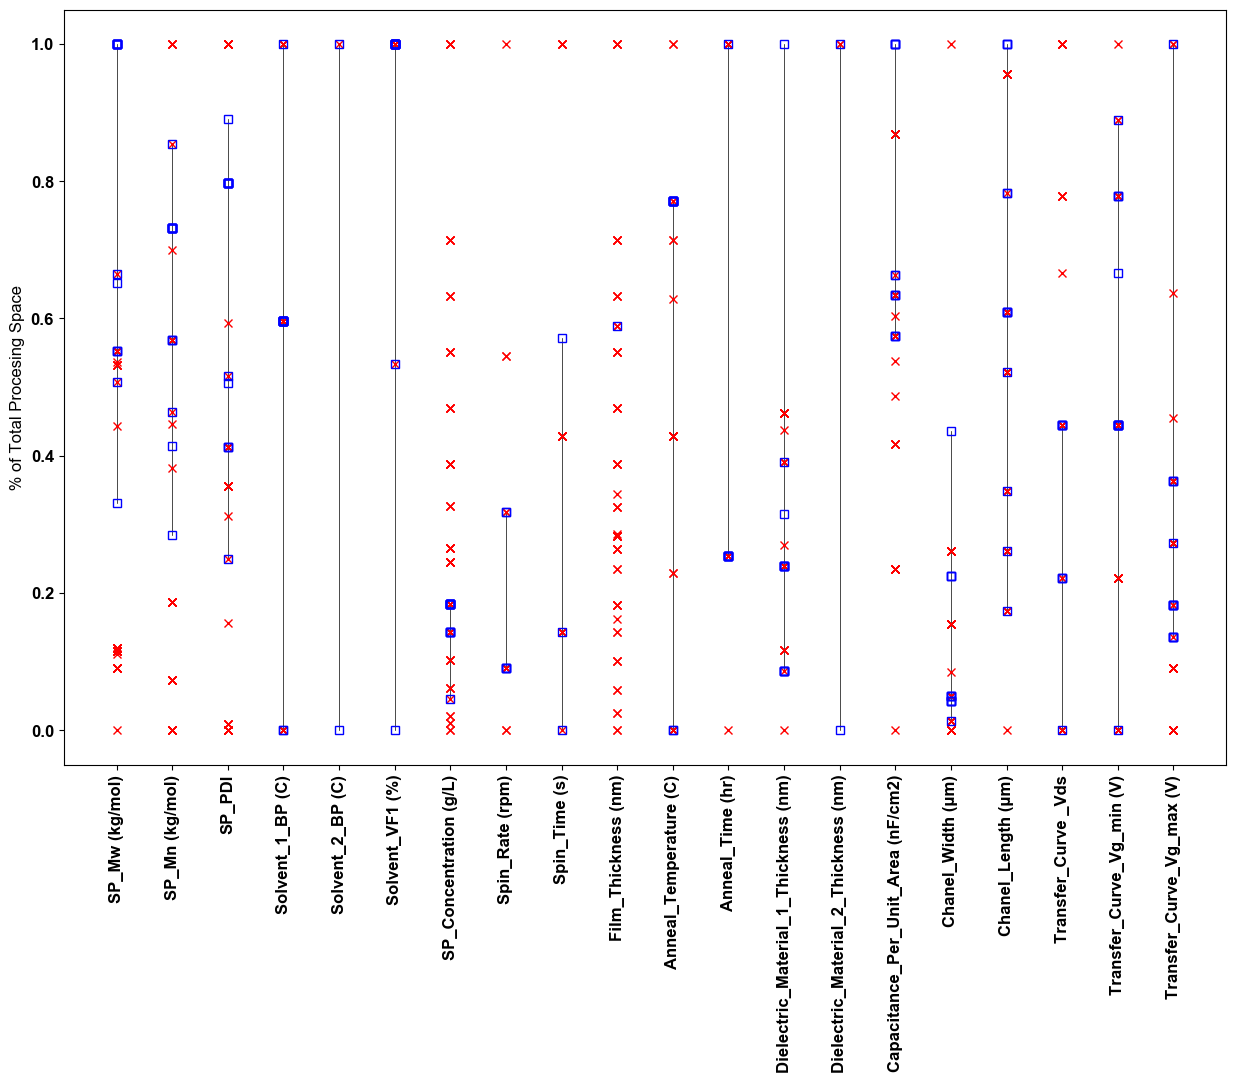

In [11]:
#Plot features vs percentage of processing space

fig, ax = plt.subplots(figsize=(15,10),dpi=100)
cols = df_XNumerical.columns
for i,column in enumerate(cols):
    x = np.ones(len(Norm_design_region[column]))*i
    high = np.ones(len(Norm_high_points[column]))*i
    low = np.ones(len(Norm_low_points[column]))*i
    ax.plot(x,Norm_design_region[column].values,'k',linewidth=0.5)
    ax.plot(low,Norm_low_points[column].values,'rx')
    ax.plot(high,Norm_high_points[column].values,'bs',markerfacecolor='none')
    
ax.set(
    xticks = np.arange(len(cols)),
)

ax.set_xticklabels(

    cols, rotation = 90

)

ax.set(ylabel=' % of Total Procesing Space ')

The blue square points are the 'high' performing devices while the red x points are the 'low' performing devices. 

The quality of the RDR for a specific feature is evaluated by considering two custom metrics ($r_s$ & $F_r$) that characterize the RDR relative to the total design space. 

The size reduction metric ($r_s$) searches for individual features in which the high points were constrained to a small fraction of the total design space. The metric ($F_r$) accounts for non-uniformity of data density and finds features that exclude more low observations in the RDR.



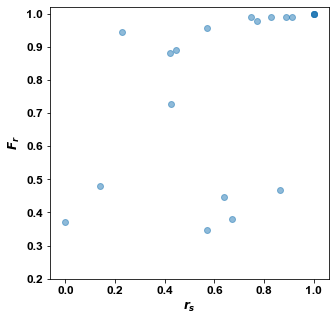

In [12]:
##Calculate rs and Fr (whole dataset)

#Volumetric design region reduction - rs
volume_total = np.max(df_XNumerical)-np.min(df_XNumerical)
volume_reduced = design_region.loc['upperbound'] - design_region.loc['lowerbound']
rs = volume_reduced/volume_total

#Fractional exclusion of low points - fr
isInRange = (df_XNumerical >= design_region.loc['lowerbound']) == (df_XNumerical <= design_region.loc['upperbound'])
Fr = np.sum(isInRange)/len(labels) #number of points in rdr/number of points in total space

#PLot
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(rs,Fr,alpha=0.5)
ax.set(xlabel='$r_s$', ylabel='$F_r$', ylim=[0.2,1.02]);
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
#ax.yaxis.set_minor_locator(MultipleLocator(0.025))
#ax.xaxis.set_minor_locator(MultipleLocator(0.025))



Here, we perform bootstrapping by incorporating leave-one-out partitioning. Each subset is evaluated for the design region metrics, and the features with the best metrics are counted for each subset. The best features will appear as good features for all or almost all subsets:

In [13]:
from sklearn.model_selection import LeaveOneOut 

def featureselection(df_X, labels, rs_lim = 0.5, Fr_lim = 0.5): 
    
    #Matrix with design region values of high points only
    high_points = df_X[labels]
    upperlims = np.max(high_points)
    lowerlims = np.min(high_points)
    
    #Volumetric reduction metric
    r_s = (upperlims-lowerlims)/(np.max(df_X)-np.min(df_X))

    #Fractional reduction metric
    isInRange = (df_X >= lowerlims) == (df_X <= upperlims)
    Fr = np.sum(isInRange)/len(labels)
    
    #Feature selection criteria
    a = (r_s < rs_lim) & (Fr < Fr_lim) #Can be changed for sensitivity
    bestfeatures = df_X.columns[a]
    
    return bestfeatures, r_s, Fr

loo = LeaveOneOut()
# loo.get_n_splits(X)
df_XNumerical.reindex(range(len(labels)))

feature_array = np.array([])

for train_index, test_index in loo.split(df_XNumerical):

    X_train, X_test = df_XNumerical.iloc[train_index], df_XNumerical.iloc[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    bestfeatures_i, rs_i, Fr_i = featureselection(X_train, y_train,rs_lim=0.80,Fr_lim=0.80) #This threshold can be adjusted
    feature_array = np.append(feature_array,np.array(bestfeatures_i))
    print('Processing partition number: {}/{} .............'.format(test_index+1,loo.get_n_splits(df_XNumerical)))
print('Done')

feature_bin, feature_counts = np.unique(feature_array,return_counts=True)
best_features = feature_bin[feature_counts >= 92] #replace this number with the total number of data points in total design region
print(best_features)

Processing partition number: [1]/92 .............
Processing partition number: [2]/92 .............
Processing partition number: [3]/92 .............
Processing partition number: [4]/92 .............
Processing partition number: [5]/92 .............
Processing partition number: [6]/92 .............
Processing partition number: [7]/92 .............
Processing partition number: [8]/92 .............
Processing partition number: [9]/92 .............
Processing partition number: [10]/92 .............
Processing partition number: [11]/92 .............
Processing partition number: [12]/92 .............
Processing partition number: [13]/92 .............
Processing partition number: [14]/92 .............
Processing partition number: [15]/92 .............
Processing partition number: [16]/92 .............
Processing partition number: [17]/92 .............
Processing partition number: [18]/92 .............
Processing partition number: [19]/92 .............
Processing partition number: [20]/92 ...

The most insightful features as recommended by the algorithm are : 
    * Capacitance_Per_Unit_Area (nF/cm2)
    * SP_Concentration (g/L)
    * SP_Mn (kg/mol)- Weight average molecular weight (kg/mol)
    * SP_Mw (kg/mol)- Number average molecular weight (kg/mol)
    * SP_PDI - polydispersity Index
    

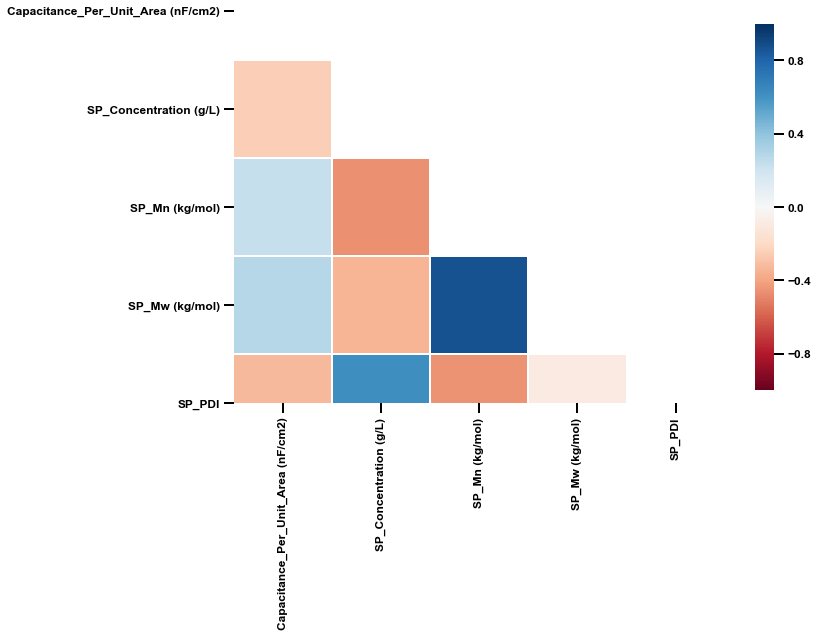

In [14]:
# %%Here, we can check the correlation matrix for the best identified features: 

import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df_XNumerical_scaled = df_XNumerical.copy()
df_XNumerical_scaled[:] = scaler.fit_transform(df_XNumerical)

corr = df_XNumerical_scaled[best_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, 
            mask=mask, 
            cmap='RdBu', 
            vmax=1,
            vmin=-1,
            center=0,
            square=True, 
            linewidths=.8, 
            cbar_kws={"shrink": .75}
           );

We can investigate the features/processing variables selected by the algorithm further in detail.

Note : Additional variables such as the categorical and remaining numerical variables can also be further investigated but has not been done in this notebook

## Further Investigation of Processing Variables

[Text(0, 0.5, 'Hole $Mobility (cm^2/V.s)'), Text(0.5, 0, ' Mw (Kg/mol) ')]

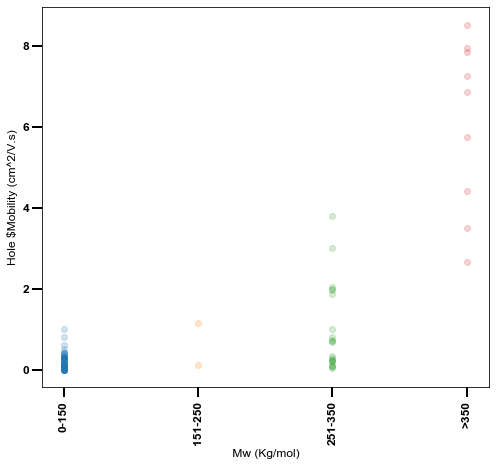

In [15]:
#Plotting Mobility versus Weight Average Molecular weight 
df_0to150_MW = df[df['SP_Mw (kg/mol)'].between(0, 150)]
df_150to250_MW = df[df['SP_Mw (kg/mol)'].between(151, 250)]
df_250to350_MW = df[df['SP_Mw (kg/mol)'].between(251, 350)]
df_350above_MW = df[df['SP_Mw (kg/mol)'].between(351, 600)]

#making new df and storing desired mobility values in it
df_0to150_MW_mob = pd.DataFrame(columns=['0-150'])
df_150to250_mob = pd.DataFrame(columns=['151-250'])
df_250to350_mob = pd.DataFrame(columns=['251-350'])
df_350above_mob = pd.DataFrame(columns=['>350'])

df_0to150_MW_mob['0-150'] = df_0to150_MW['Average_OFET_Hole_Mobility (cm2/Vs)'].values
df_150to250_mob['151-250'] = df_150to250_MW ['Average_OFET_Hole_Mobility (cm2/Vs)'].values
df_250to350_mob['251-350'] = df_250to350_MW['Average_OFET_Hole_Mobility (cm2/Vs)'].values
df_350above_mob['>350'] = df_350above_MW['Average_OFET_Hole_Mobility (cm2/Vs)'].values

#combining all DF's into one DF
df_MW_mob = pd.concat([df_0to150_MW_mob,df_150to250_mob,df_250to350_mob,df_350above_mob], axis=1)

fig, ax = plt.subplots(figsize=(8,7))
cols = df_MW_mob.columns
for i,column in enumerate(cols):
    x = np.ones(len(df_MW_mob[column]))*i
    ax.scatter(x,df_MW_mob[column].values,alpha=0.2)

ax.set(
    xticks = np.arange(len(cols)),
)

ax.set_xticklabels(

    cols, rotation = 90

)

ax.set(xlabel=' Mw (Kg/mol) ',ylabel='Hole $Mobility (cm^2/V.s)')

[Text(0, 0.5, 'Hole Mobility (cm^2/V.s)'), Text(0.5, 0, 'Mn (Kda)')]

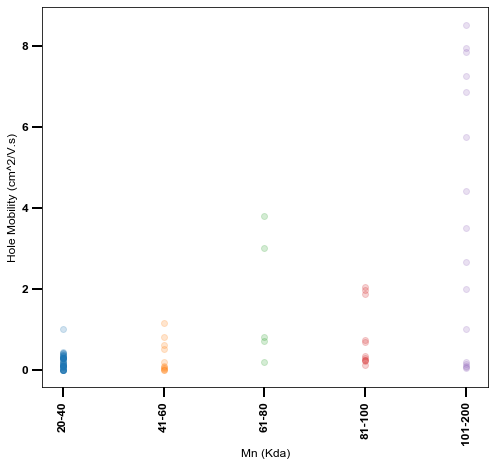

In [16]:
#Plotting Mobility versus Number Average Molecular weight (kg/mol)
#storing values 

#storing values 

df_20to40_Mn = df[df['SP_Mn (kg/mol)'].between(20, 40)]
df_40to60_Mn = df[df['SP_Mn (kg/mol)'].between(41, 60)]
df_60to80_Mn = df[df['SP_Mn (kg/mol)'].between(61, 80)]
df_80to100_Mn = df[df['SP_Mn (kg/mol)'].between(81, 100)]
df_100above_Mn = df[df['SP_Mn (kg/mol)'].between(101, 200)]


#making new df and storing desired mobility values in it
df_20to40_Mn_mob = pd.DataFrame(columns=['20-40'])
df_40to60_Mn_mob = pd.DataFrame(columns=['41-60'])
df_60to80_Mn_mob = pd.DataFrame(columns=['61-80'])
df_80to100_Mn_mob = pd.DataFrame(columns=['81-100'])
df_100above_Mn_mob = pd.DataFrame(columns=['101-200'])


df_20to40_Mn_mob['20-40'] = df_20to40_Mn['Average_OFET_Hole_Mobility (cm2/Vs)'].values
df_40to60_Mn_mob['41-60'] = df_40to60_Mn ['Average_OFET_Hole_Mobility (cm2/Vs)'].values
df_60to80_Mn_mob['61-80'] = df_60to80_Mn['Average_OFET_Hole_Mobility (cm2/Vs)'].values
df_80to100_Mn_mob['81-100'] = df_80to100_Mn ['Average_OFET_Hole_Mobility (cm2/Vs)'].values
df_100above_Mn_mob['101-200'] = df_100above_Mn['Average_OFET_Hole_Mobility (cm2/Vs)'].values

#combining all DF's into one DF
df_Mn_mob = pd.concat([df_20to40_Mn_mob,df_40to60_Mn_mob,df_60to80_Mn_mob,df_80to100_Mn_mob,df_100above_Mn_mob], axis=1)

fig, ax = plt.subplots(figsize=(8,7))
cols = df_Mn_mob.columns
for i,column in enumerate(cols):
    x = np.ones(len(df_Mn_mob[column]))*i
    ax.scatter(x,df_Mn_mob[column].values,alpha=0.2)

ax.set(
    xticks = np.arange(len(cols)),
)

ax.set_xticklabels(

    cols, rotation = 90

)

ax.set(xlabel='Mn (Kda)',ylabel='Hole Mobility (cm^2/V.s)')


[Text(0, 0.5, 'Hole Mobility (cm^2/V.s)'), Text(0.5, 0, 'PDI')]

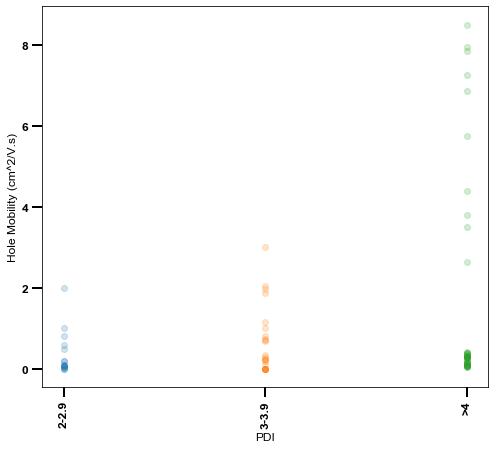

In [17]:
#%% plotting mobility vs PDI box plots
df_2to3_PDI = df[df['SP_PDI'].between(2, 2.9)]
df_3to4_PDI = df[df['SP_PDI'].between(3, 3.9)]
df_4above_PDI = df[df['SP_PDI'].between(4, 6)]

#making new df and storing desired mobility values in it
df_2to3_PDI_mob = pd.DataFrame(columns=['2-2.9'])
df_3to4_PDI_mob = pd.DataFrame(columns=['3-3.9'])
df_4above_PDI_mob = pd.DataFrame(columns=['>4'])

df_2to3_PDI_mob['2-2.9'] = df_2to3_PDI['Average_OFET_Hole_Mobility (cm2/Vs)'].values
df_3to4_PDI_mob['3-3.9'] = df_3to4_PDI['Average_OFET_Hole_Mobility (cm2/Vs)'].values
df_4above_PDI_mob['>4'] = df_4above_PDI['Average_OFET_Hole_Mobility (cm2/Vs)'].values

#combining all DF's into one DF
#df_PDI_mob = pd.concat([df_2to3_PDI_mob,df_3to4_PDI_mob,df_4to5_PDI_mob,df_5above_PDI_mob], axis=1)
df_PDI_mob = pd.concat([df_2to3_PDI_mob,df_3to4_PDI_mob,df_4above_PDI_mob], axis=1)

fig, ax = plt.subplots(figsize=(8,7))
cols = df_PDI_mob.columns
for i,column in enumerate(cols):
    x = np.ones(len(df_PDI_mob[column]))*i
    ax.scatter(x,df_PDI_mob[column].values,alpha=0.2)

ax.set(
    xticks = np.arange(len(cols)),
)

ax.set_xticklabels(

    cols, rotation = 90

)

ax.set(xlabel='PDI',ylabel='Hole Mobility (cm^2/V.s)')

We observe hole mobility increasing as a function of the weight average molecular weight (Mn),number average molecular weight (Mw) and PDI.

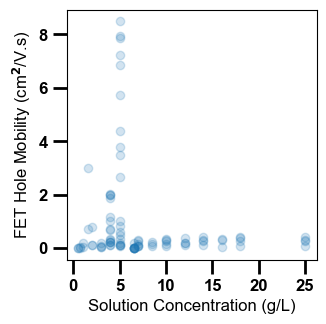

In [18]:
#%% Plotting Mobility versus SP_Initial Conc
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
varx = 'SP_Concentration (g/L)'
vary = 'Average_OFET_Hole_Mobility (cm2/Vs)'

fig, ax = plt.subplots(figsize=(8,7),dpi=100)
ax.scatter(df_XNumerical['SP_Concentration (g/L)'],df_Y['Average_OFET_Hole_Mobility (cm2/Vs)'],alpha=0.2)
ax.set(xlabel='Solution Concentration (g/L)', ylabel='FET Hole Mobility (cm$^2$/V.s)');
ax.xaxis.set_major_locator(MultipleLocator(5))
set_size(2.5,2.5)


Higher mobilities obtained for devices prepared from solutions having a concentration between 4 and 5 g/L

We can select combinations of features and plot them simultaneously to visualize the reduced design region

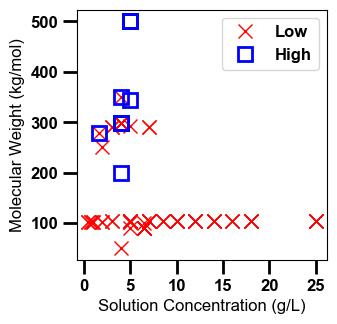

In [19]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

varx = 'SP_Concentration (g/L)' #change this if you want to look at another processing variable
vary = 'SP_Mw (kg/mol)' #change this if you want to look at another processing variable

#Reduced design region based on high/low labeling
fig, ax = plt.subplots(figsize=(8,7),dpi=100)
ax.plot(low_points[varx],low_points[vary],'rx',markersize=10)
ax.plot(high_points[varx],high_points[vary],'bs',markersize=10,markerfacecolor='none',markeredgewidth=2)
ax.legend(['Low','High'])
ax.set(xlabel='Solution Concentration (g/L)',ylabel='Molecular Weight (kg/mol)')

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
ax.xaxis.set_major_locator(MultipleLocator(5))
set_size(2.5,2.5)

Results indicate that choosing a Mw between 200-500 kg/mol and solution concentration between 2 and 5 g/L would be more likely to result in a high-performing OFET device. 